<a href="https://colab.research.google.com/github/vinayprabhu/Favorite_PyPi_2020/blob/main/Pypi_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here are my favorite/top PyPi packages of 2020:



In [1]:
!pip install --quiet neural-structured-learning
!pip install --quiet larq larq-zoo 
!pip install --quiet kymatio
!pip install --quiet netcal
!pip install --quiet baycomp
!pip install --quiet pyeer
!pip install --quiet pyod
!pip install --quiet hyppo
!pip install --quiet gradio
!pip install --quiet jupyter_to_medium

1: [NSL](https://www.tensorflow.org/neural_structured_learning)
Neural Structured Learning (NSL) in tensorflow


[NSL Example Notebook](https://colab.research.google.com/drive/1yidXh-kM6fMi5c0yEXonvG4GFdcDO0-d#scrollTo=gRfU8T3BTYep&line=2&uniqifier=1)

In [2]:
import tensorflow as tf
import neural_structured_learning as nsl
import numpy as np
import matplotlib.pyplot as plt

# Prepare data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a base model -- sequential, functional, or subclass.
model = tf.keras.Sequential([
    tf.keras.Input((28, 28), name='feature'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Wrap the model with adversarial regularization.
adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

# Compile, train, and evaluate.
adv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
adv_model.fit({'feature': x_train, 'label': y_train}, batch_size=32, epochs=5)
adv_model.evaluate({'feature': x_test, 'label': y_test})

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f653a1ebe58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f653a1ebe58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f653a1ebe58> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


1875/1875 [==============================] - 40s 2ms/step - loss: 0.5151 - sparse_categorical_crossentropy: 0.4236 - sparse_categorical_accuracy: 0.8809 - scaled_adversarial_loss: 0.0915
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1535 - sparse_categorical_crossentropy: 0.1242 - sparse_categorical_accuracy: 0.9644 - scaled_adversarial_loss: 0.0294
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0981 - sparse_categorical_crossentropy: 0.0787 - sparse_categorical_accuracy: 0.9767 - scaled_adversarial_loss: 0.0193
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0737 - sparse_categorical_crossentropy: 0.0587 - sparse_categorical_accuracy: 0.9819 - scaled_adversarial_loss: 0.0149
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0559 - sparse_categorical_crossentropy: 0.0443 - sparse_categorical_accuracy: 0.9871 - scaled_adversarial_loss: 0.0116


313/313 [==============================] - 1s 3ms/step - loss: 0.0837 - sparse_categorical_crossentropy: 0.0668 - sparse_categorical_accuracy: 0.9783 - scaled_adversarial_loss: 0.0169


[0.08370136469602585,
 0.06679880619049072,
 0.9782999753952026,
 0.01690255105495453]

In [3]:
Y_pred_test=adv_model.predict({'feature': x_test, 'label': y_test})
Y_pred_test.shape

(10000, 10)

[Netcal](https://pypi.org/project/netcal/)

```
!pip3 install git+https://github.com/p-lambda/verified_calibration.git # PyPi--> Kaput
```

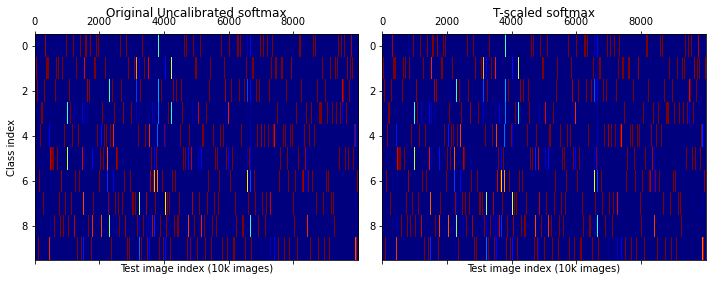

In [4]:
from netcal.scaling import TemperatureScaling
import matplotlib.pyplot as plt

### Initialize and transform

temperature = TemperatureScaling()
temperature.fit(Y_pred_test, y_test)
calibrated = temperature.transform(Y_pred_test)
### Visualization

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
axes[0].matshow(Y_pred_test.T,aspect='auto', cmap='jet')
axes[0].set_title("Original Uncalibrated softmax")
axes[0].set_xlabel("Test image index (10k images)")
axes[0].set_ylabel("Class index")
# axes[0].set_xticks([])
axes[1].matshow(calibrated.T,aspect='auto', cmap='jet')
axes[1].set_title("T-scaled softmax")
axes[1].set_xlabel("Test image index (10k images)")
# axes[1].set_xticks([])
plt.tight_layout()
plt.show()

In [5]:
y_test_pred=np.argmax(Y_pred_test,axis=1)
ind_correct=np.where(y_test_pred==y_test)[0]
ind_wrong=np.where(y_test_pred!=y_test)[0]

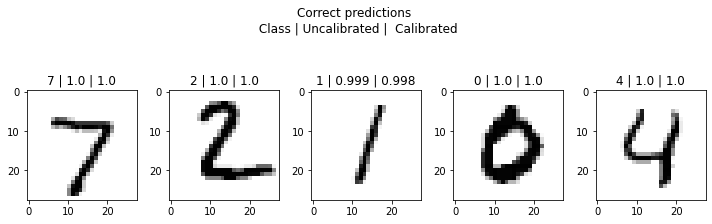

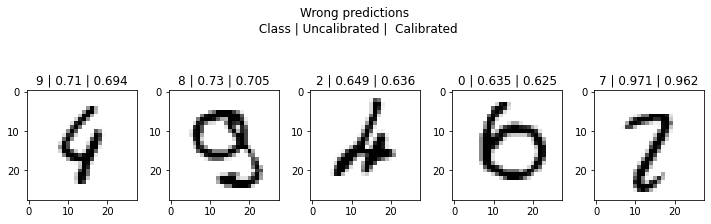

In [6]:
plt.figure(figsize=(10,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  ind_i=ind_correct[i]
  plt.imshow(x_test[ind_i],cmap='gray_r')
  class_pred_i=np.argmax(Y_pred_test[ind_i,:])
  softmax_uncalib_i=str(np.round(Y_pred_test[ind_i,class_pred_i],3))
  softmax_calib_i=str(np.round(calibrated[ind_i,class_pred_i],3))
  plt.title(f'{class_pred_i} | {softmax_uncalib_i} | {softmax_calib_i}')
plt.tight_layout()
plt.suptitle('Correct predictions \n Class | Uncalibrated |  Calibrated');
#############################################
plt.figure(figsize=(10,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  ind_i=ind_wrong[i]
  plt.imshow(x_test[ind_i],cmap='gray_r')
  class_pred_i=np.argmax(Y_pred_test[ind_i,:])
  softmax_uncalib_i=str(np.round(Y_pred_test[ind_i,class_pred_i],3))
  softmax_calib_i=str(np.round(calibrated[ind_i,class_pred_i],3))
  plt.title(f'{class_pred_i} | {softmax_uncalib_i} | {softmax_calib_i}')
plt.tight_layout()
plt.suptitle('Wrong predictions \n Class | Uncalibrated |  Calibrated');



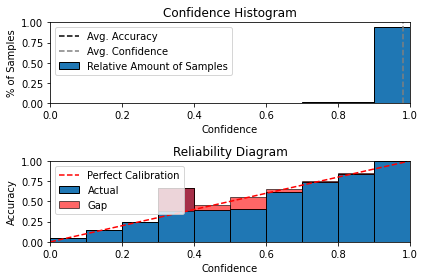

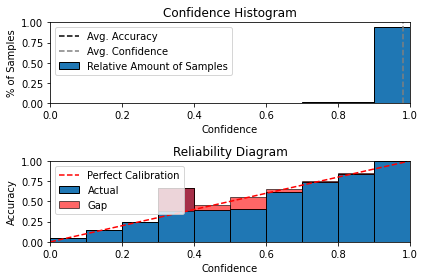

In [7]:
from netcal.presentation import ReliabilityDiagram
n_bins = 10
diagram = ReliabilityDiagram(n_bins)
diagram.plot(Y_pred_test, y_test)  # visualize miscalibration of uncalibrated

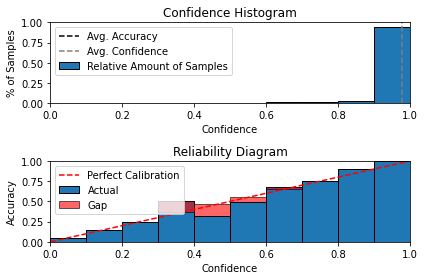

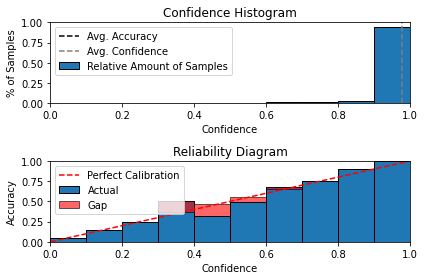

In [8]:
diagram.plot(calibrated, y_test)   # visualize miscalibration of calibrated

# Kymatio



In [9]:
# 1: Imports

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from kymatio.keras import Scattering2D
# Above, we import the Scattering2D class from the kymatio.keras package.

# 2: Model definition

inputs = Input(shape=(28, 28))
x = Scattering2D(J=3, L=8)(inputs)
x = Flatten()(x)
x_out = Dense(10, activation='softmax')(x)
model_kymatio = Model(inputs, x_out)
print(model_kymatio.summary())

# 3: Compile and train

model_kymatio.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# We then train the model_kymatio using model_kymatio.fit on a subset of the MNIST data.
model_kymatio.fit(x_train[:10000], y_train[:10000], epochs=15,
          batch_size=64, validation_split=0.2)
# Finally, we evaluate the model_kymatio on the held-out test data.

model_kymatio.evaluate(x_test, y_test)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
scattering2d (Scattering2D)  (None, 217, 3, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1953)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                19540     
Total params: 19,540
Trainable params: 19,540
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
125/125 [==============================] - 53s 339ms/step - loss: 2.2337 - accuracy: 0.3007 - val_loss: 2.0396 - val_accuracy: 0.7880
Epoch 2/15
125/125 [==============================] - 36s 291ms/step - loss: 1.9842 - accuracy: 0.7921 - 

[0.6451343894004822, 0.9283999800682068]

[LARQ](https://docs.larq.dev/zoo/tutorials/)

In [10]:
import larq as lq
# MODEL DEFINITION (All quantized layers except the first will use the same options)

kwargs = dict(input_quantizer="ste_sign",
              kernel_quantizer="ste_sign",
              kernel_constraint="weight_clip")

model_bnn = tf.keras.models.Sequential()

# In the first layer we only quantize the weights and not the input
model_bnn.add(lq.layers.QuantConv2D(32, (3, 3),
                                kernel_quantizer="ste_sign",
                                kernel_constraint="weight_clip",
                                use_bias=False,
                                input_shape=(28, 28, 1)))
model_bnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_bnn.add(tf.keras.layers.BatchNormalization(scale=False))

model_bnn.add(lq.layers.QuantConv2D(64, (3, 3), use_bias=False, **kwargs))
model_bnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_bnn.add(tf.keras.layers.BatchNormalization(scale=False))

model_bnn.add(lq.layers.QuantConv2D(64, (3, 3), use_bias=False, **kwargs))
model_bnn.add(tf.keras.layers.BatchNormalization(scale=False))
model_bnn.add(tf.keras.layers.Flatten())

model_bnn.add(lq.layers.QuantDense(64, use_bias=False, **kwargs))
model_bnn.add(tf.keras.layers.BatchNormalization(scale=False))
model_bnn.add(lq.layers.QuantDense(10, use_bias=False, **kwargs))
model_bnn.add(tf.keras.layers.BatchNormalization(scale=False))
model_bnn.add(tf.keras.layers.Activation("softmax"))

# MODEL DEFINITON AND TRAINING 

print(lq.models.summary(model_bnn))
model_bnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

x_train_bnn = x_train.reshape((60000, 28, 28, 1))
x_test_bnn = x_test.reshape((10000, 28, 28, 1))
model_bnn.fit(x_train_bnn,y_train, batch_size=64, epochs=6)

test_loss, test_acc = model_bnn.evaluate(x_test_bnn, y_test)
print(f"Test accuracy {test_acc * 100:.2f} %")

+sequential_1 stats----------------------------------------------------------------------------------------+
| Layer                  Input prec.           Outputs  # 1-bit  # 32-bit  Memory  1-bit MACs  32-bit MACs |
|                              (bit)                        x 1       x 1    (kB)                          |
+----------------------------------------------------------------------------------------------------------+
| quant_conv2d                     -  (-1, 26, 26, 32)      288         0    0.04           0       194688 |
| max_pooling2d                    -  (-1, 13, 13, 32)        0         0       0           0            0 |
| batch_normalization              -  (-1, 13, 13, 32)        0        64    0.25           0            0 |
| quant_conv2d_1                   1  (-1, 11, 11, 64)    18432         0    2.25     2230272            0 |
| max_pooling2d_1                  -    (-1, 5, 5, 64)        0         0       0           0            0 |
| batch_normalizati

Top-5 predictions: [('n02504458', 'African_elephant', 0.7053231), ('n01871265', 'tusker', 0.2933379), ('n02504013', 'Indian_elephant', 0.001338586), ('n02408429', 'water_buffalo', 7.938418e-08), ('n01704323', 'triceratops', 7.2361296e-08)]


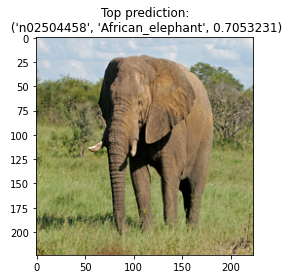

In [11]:
import tensorflow_datasets as tfds
import larq_zoo as lqz
from urllib.request import urlopen
from PIL import Image


#####################################

img_path = "https://raw.githubusercontent.com/larq/zoo/master/tests/fixtures/elephant.jpg"

with urlopen(img_path) as f:
    img = Image.open(f).resize((224, 224))

x = tf.keras.preprocessing.image.img_to_array(img)
x = lqz.preprocess_input(x)
x = np.expand_dims(x, axis=0)
model = lqz.sota.QuickNet(weights="imagenet")
preds = model.predict(x)
pred_dec=lqz.decode_predictions(preds, top=5)[0]
print(f'Top-5 predictions: {pred_dec}')

#####################################

pred_dec=lqz.decode_predictions(preds, top=5)[0]
plt.imshow(img)
plt.title(f'Top prediction:\n {pred_dec[0]}');

#  [Baycomp](https://baycomp.readthedocs.io/)

Rope: _Region of practical equivalence_


First, let us generate two synthetic classifier accuracy vectors across 10 hypothetical datasets.

The mean accuracies of the two classifiers are: 82.2 and 84.1


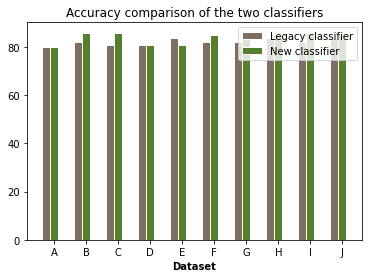

In [12]:
import string
from baycomp import *
# Accuracies obtained by a legacy classifier
classifier_legacy_acc=np.random.randint(80,85,size=(10))
mean_legacy=np.mean(classifier_legacy_acc)
# Accuracies obtained by a new-proposed classifier
classifier_new_acc=np.random.randint(80,87,size=(10))
mean_new=np.mean(classifier_new_acc)
print(f'The mean accuracies of the two classifiers are: {mean_legacy} and {mean_new}')
# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(classifier_legacy_acc))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, classifier_legacy_acc, color='#7f6d5f', width=barWidth, edgecolor='white', label='Legacy classifier')
plt.bar(r2, classifier_new_acc, color='#557f2d', width=barWidth, edgecolor='white', label='New classifier')
 
# Add xticks on the middle of the group bars
plt.xlabel('Dataset', fontweight='bold')
plt.xticks([r + barWidth for r in range(10)],list(string.ascii_uppercase[0:len(classifier_legacy_acc)]))
plt.title('Accuracy comparison of the two classifiers') 

# Create legend & Show graphic
plt.legend()
plt.show()

 They compute three probabilities: the probability that the first classifier has higher scores than the second, the probability that differences are within the region of practical equivalence (rope), or that the second classifier has higher scores. We will refer to this probabilities as:
  $p_{left}, p_{rope} \text{and }p_{right}$.

  1: Two shortcut functions can be used for comparison on single and
 on multiple data sets. 
 If classifier_legacy_acc and classifier_new_acc contain a list of 
 average classification accuracies of classifier-legacy and 
classifier-new on a collection of data sets, we can call
(Actual outputs may differ due to Monte Carlo sampling.)

$p_{left}, p_{rope},p_{right}$ using the two_on_multiple function: 
(0.00804, 0.07622, 0.91574)
$p_{left}, p_{rope},p_{right}$ using the SignedRankTest.probs function: 
(0.00776, 0.07436, 0.91788)
Figure(432x288)
(0.00792, 0.07228, 0.9198)


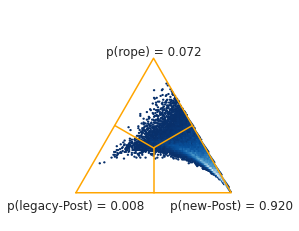

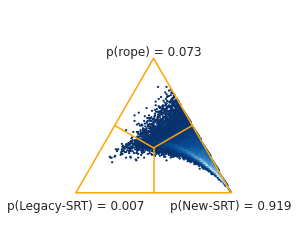

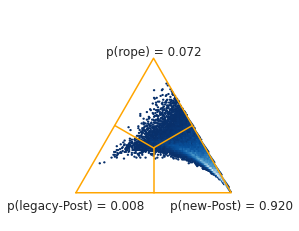

In [13]:
print('$p_{left}, p_{rope},p_{right}$ using the two_on_multiple function: ')
print(two_on_multiple(classifier_legacy_acc, classifier_new_acc, rope=1))

# With some additional arguments, the function can also plot the posterior distribution from 
# which these probabilities came.
# Tests are packed into test classes. 
# The above call is equivalent to

print('$p_{left}, p_{rope},p_{right}$ using the SignedRankTest.probs function: ')
print(SignedRankTest.probs(classifier_legacy_acc, classifier_new_acc, rope=1))

# and to get a plot, we call

print(SignedRankTest.plot(classifier_legacy_acc, classifier_new_acc, rope=1, names=("Legacy-SRT", "New-SRT")))

# To switch to another test, use another class:
SignTest.probs(classifier_legacy_acc, classifier_new_acc, rope=1)
# Finally, we can construct and query sampled posterior distributions.

posterior = SignedRankTest(classifier_legacy_acc, classifier_new_acc, rope=1)
print(posterior.probs())
posterior.plot(names=("legacy-Post", "new-Post"))



[PYOD](https://pyod.readthedocs.io/en/latest/)

In [14]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN   # kNN detector
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


# Generate sample data with pyod.utils.data.generate_data():

contamination = 0.4  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train_ood, y_train_ood, X_test_ood, y_test_ood = generate_data(n_train=n_train, n_test=n_test, contamination=contamination)
##### 1: ABOD
clf_name_1 = 'ABOD'
clf_abod = ABOD(method="fast") # initialize detector
clf_abod.fit(X_train_ood)

y_train_pred_abod = clf_abod.predict(X_train_ood) # binary labels
y_test_pred_abod = clf_abod.predict(X_test_ood) # binary labels

y_test_scores_abod = clf_abod.decision_function(X_test_ood) # raw outlier scores
y_test_proba_abod = clf_abod.predict_proba(X_test_ood) # outlier probability

evaluate_print("ABOD", y_test_ood, y_test_scores_abod) # performance evaluation

####### 2 : KNN
clf_knn = KNN() # initialize detector
clf_knn.fit(X_train_ood)

y_train_pred_knn = clf_knn.predict(X_train_ood) # binary labels
y_test_pred_knn = clf_knn.predict(X_test_ood) # binary labels

y_test_scores_knn = clf_knn.decision_function(X_test_ood) # raw outlier scores
y_test_proba_knn = clf_knn.predict_proba(X_test_ood) # outlier probability

evaluate_print("KNN", y_test_ood, y_test_scores_knn) # performance evaluation

/usr/local/lib/python3.6/dist-packages/pyod/utils/data.py:189: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


ABOD ROC:1.0, precision @ rank n:1.0
KNN ROC:1.0, precision @ rank n:1.0


Now, let's visualize the results:

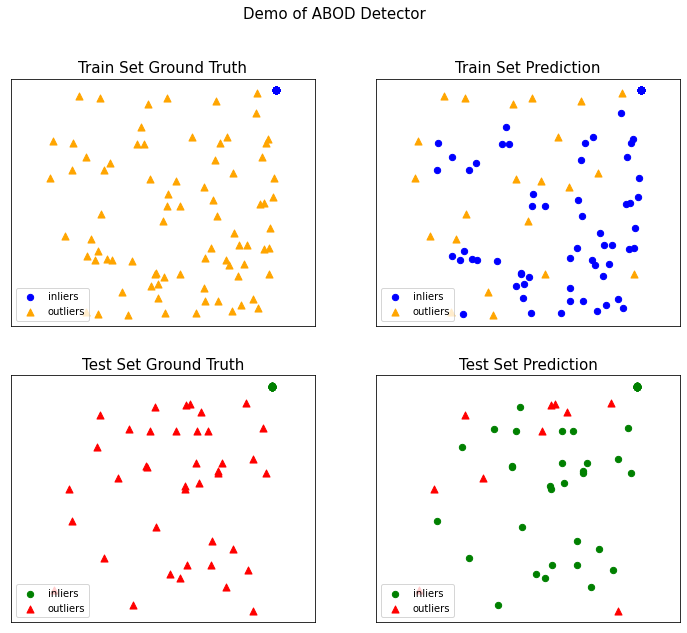

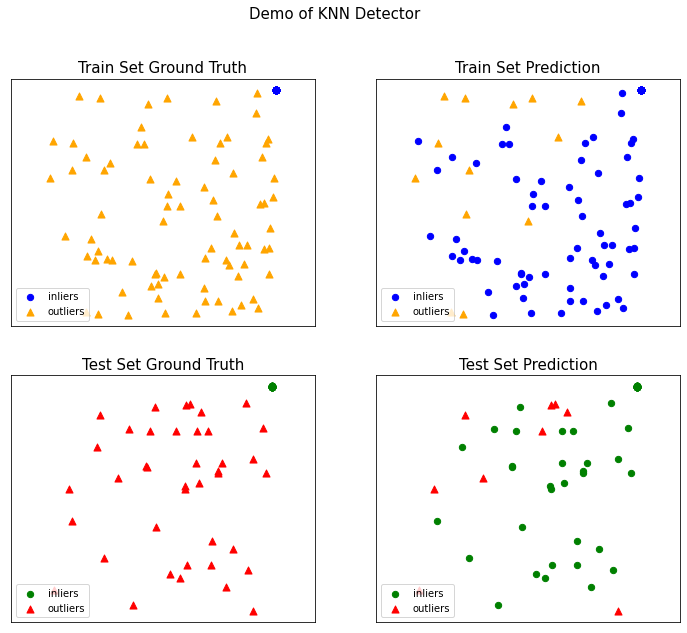

In [15]:
# ABOD Performance
visualize("ABOD", X_train_ood, y_train_ood, X_test_ood, y_test_ood, y_train_pred_abod,
          y_test_pred_abod, show_figure=True, save_figure=False)
# KNN Performance;
visualize("KNN", X_train_ood, y_train_ood, X_test_ood, y_test_ood, y_train_pred_knn,
          y_test_pred_knn, show_figure=True, save_figure=False)


[PyEER](https://pypi.org/project/pyeer/)


EER-KNN = 0.0, EER-ABOD = 0.0


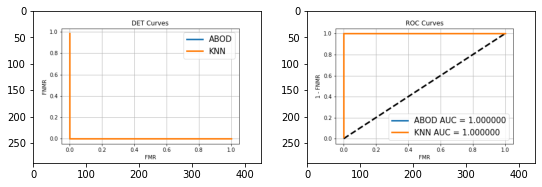

In [16]:
from pyeer.eer_info import get_eer_stats
from pyeer.report import generate_eer_report, export_error_rates
from pyeer.plot import plot_eer_stats

# Gather up all the 'Genuine scores' and the 'impostor scores'

gscores_abod=y_test_proba_abod[y_test_ood==0,0]
iscores_abod=y_test_proba_abod[y_test_ood==1,0]

gscores_knn=y_test_proba_knn[y_test_ood==0,0]
iscores_knn=y_test_proba_knn[y_test_ood==1,0]

# Calculating stats for classifier A
stats_abod = get_eer_stats(gscores_abod, iscores_abod)

# Calculating stats for classifier B
stats_knn = get_eer_stats(gscores_knn, iscores_knn)
print(f'EER-KNN = {stats_knn.eer}, EER-ABOD = {stats_abod.eer}')
plot_eer_stats([stats_abod, stats_knn], ['ABOD', 'KNN'])
import matplotlib.image as mpimg
img1 = mpimg.imread('DET.png')
img2 = mpimg.imread('ROC.png')

plt.figure(figsize=(9,4))
plt.subplot(121)
plt.imshow(img1)

plt.subplot(122)
plt.imshow(img2)
plt.show()

# [hyppo](https://hyppo.neurodata.io/index.html)

In [17]:
from hyppo.ksample import KSample
samp_in_train= X_train_ood[y_train_ood==0]
samp_out_train= X_train_ood[y_train_ood==1]

samp_in_test= X_test_ood[y_test_ood==0]
samp_out_test= X_test_ood[y_test_ood==1]


stat_in_out, pvalue_in_out = KSample("Dcorr").test(samp_in_train, samp_out_test)
print(f'In-train v/s Out-test \n Energy test statistic: {stat_in_out}. Energy p-value: {pvalue_in_out}')

stat_out_in, pvalue_out_in = KSample("Dcorr").test(samp_in_test, samp_out_train)
print(f'In-test v/s Out-train \n Energy test statistic: {stat_out_in}. Energy p-value: {pvalue_out_in}')

stat_in_in, pvalue_in_in = KSample("Dcorr").test(samp_in_train, samp_in_test)
print(f'In-train v/s In-test \n Energy test statistic: {stat_in_in}. Energy p-value: {pvalue_in_in}')

stat_out_out, pvalue_out_out = KSample("Dcorr").test(samp_out_train, samp_out_test)
print(f'Out-train v/s Out-test \n Energy test statistic: {stat_out_out}. Energy p-value: {pvalue_out_out}')

In-train v/s Out-test 
 Energy test statistic: 0.8840879970848536. Energy p-value: 7.737405488330048e-33
In-test v/s Out-train 
 Energy test statistic: 0.7843719625931191. Energy p-value: 6.505425977708557e-26
In-train v/s In-test 
 Energy test statistic: 0.00779175693344241. Energy p-value: 0.12114025800580673
Out-train v/s Out-test 
 Energy test statistic: 0.013555113809996683. Energy p-value: 0.10508562343873179


# [Gradio](https://gradio.app/ml_examples)


[Saliency hub link](http://saliency-model.gradiohub.com/)

In [18]:
import gradio as gr
import requests
import tensorflow as tf

inception_net = tf.keras.applications.InceptionV3() # load the model

# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")

def classify_image(inp):
  print(inp.shape)
  inp = inp.reshape((-1, 299, 299, 3))
  inp = tf.keras.applications.inception_v3.preprocess_input(inp)
  prediction = inception_net.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(299, 299, 3))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=classify_image, inputs=image, outputs=label, capture_session=True).launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, email support@gradio.app
Running on External URL: https://11051.gradio.app
Interface loading below...


ERROR:gradio.networking:Exception on /api/predict/ [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.6/dist-packages/flask_cors/extension.py", line 165, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.6/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1936, in dispatch_request
    retu

KeyboardInterrupt: ignored